In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/fake_product_reviews_dataset.csv')

In [3]:
data.head()

,id,label,review
0,1,0,"Overall, I am quite satisfied. The device matc..."
1,2,0,"I purchased this device a few weeks ago, and i..."
2,3,0,"After reading several positive reviews, I deci..."
3,4,0,"I ve been using this for about a month now, an..."
4,5,0,This is exactly what I was looking for. The de...


## Data Preprocessing

In [4]:
data.shape


(5000, 3)

In [5]:
data.duplicated().sum()


np.int64(0)

In [6]:
data.isnull().sum()


id        0
label     0
review    0
dtype: int64

### Text Preprocessing

In [7]:
import re
import string

In [8]:
data["review"].head(5)


0    Overall, I am quite satisfied. The device matc...
1    I purchased this device a few weeks ago, and i...
2    After reading several positive reviews, I deci...
3    I ve been using this for about a month now, an...
4    This is exactly what I was looking for. The de...
Name: review, dtype: object

convert uppercase to lowercase



In [9]:
data["review"] = data["review"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [10]:
data["review"].head(5)


0    overall, i am quite satisfied. the device matc...
1    i purchased this device a few weeks ago, and i...
2    after reading several positive reviews, i deci...
3    i ve been using this for about a month now, an...
4    this is exactly what i was looking for. the de...
Name: review, dtype: object

remove links



In [11]:
data["review"] = data['review'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [12]:
data["review"].head(5)


0    overall, i am quite satisfied. the device matc...
1    i purchased this device a few weeks ago, and i...
2    after reading several positive reviews, i deci...
3    i ve been using this for about a month now, an...
4    this is exactly what i was looking for. the de...
Name: review, dtype: object

Remove punctuations



In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["review"] = data["review"].apply(remove_punctuations)

In [15]:
data["review"].tail(10)


4990    after reading several positive reviews i decid...
4991    overall i am quite satisfied the product match...
4992    after reading several positive reviews i decid...
4993    i am so thrilled with this item it s way bette...
4994    this is the best product i have ever used in m...
4995    absolutely incredible this item changed my lif...
4996    i purchased this device a few weeks ago and it...
4997    i am so thrilled with this item it s way bette...
4998    i am so thrilled with this item it s way bette...
4999    after reading several positive reviews i decid...
Name: review, dtype: object

remove numbers



In [16]:
data["review"] = data['review'].str.replace(r'\d+', '', regex=True)


In [17]:
data["review"].tail(10)


4990    after reading several positive reviews i decid...
4991    overall i am quite satisfied the product match...
4992    after reading several positive reviews i decid...
4993    i am so thrilled with this item it s way bette...
4994    this is the best product i have ever used in m...
4995    absolutely incredible this item changed my lif...
4996    i purchased this device a few weeks ago and it...
4997    i am so thrilled with this item it s way bette...
4998    i am so thrilled with this item it s way bette...
4999    after reading several positive reviews i decid...
Name: review, dtype: object

remove stopwords



In [18]:
!pip install nltk



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk


In [20]:
nltk.download('stopwords', download_dir='../static/model')


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
data["review"] = data["review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [24]:
data["review"].head()


0    overall quite satisfied device matches descrip...
1    purchased device weeks ago consistently perfor...
2    reading several positive reviews decided give ...
3    using month continues work well day one really...
4    exactly looking delireally fast packaging secu...
Name: review, dtype: object

Stemming



In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data["review"] = data["review"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [27]:
data["review"].head()


0    overal quit satisfi devic match descript perfe...
1    purchas devic week ago consist perform beyond ...
2    read sever posit review decid give item tri im...
3    use month continu work well day one realli hap...
4    exactli look delir fast packag secur tool work...
Name: review, dtype: object

In [28]:
data

,id,label,review
0,1,0,overal quit satisfi devic match descript perfe...
1,2,0,purchas devic week ago consist perform beyond ...
2,3,0,read sever posit review decid give item tri im...
3,4,0,use month continu work well day one realli hap...
4,5,0,exactli look delir fast packag secur tool work...
...,...,...,...
4995,4996,1,absolut incred item chang life way even descri...
4996,4997,0,purchas devic week ago consist perform beyond ...
4997,4998,1,thrill item way better anyth els market work p...
4998,4999,1,thrill item way better anyth els market work p...


### Building Vacabulary


In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data['review']:
    vocab.update(sentence.split())

In [32]:
len(vocab)


152

In [33]:
data.shape


(5000, 3)

In [34]:
tokens = [key for key in vocab if vocab[key] > 10]

In [35]:
tokens

['overal',
 'quit',
 'satisfi',
 'devic',
 'match',
 'descript',
 'perfectli',
 'offer',
 'great',
 'valu',
 'price',
 'would',
 'definit',
 'buy',
 'custom',
 'servic',
 'experi',
 'also',
 'posit',
 'ad',
 'satisfact',
 'purchas',
 'week',
 'ago',
 'consist',
 'perform',
 'beyond',
 'expect',
 'qualiti',
 'impress',
 'build',
 'feel',
 'durabl',
 'recommend',
 'anyon',
 'look',
 'reliabl',
 'friend',
 'even',
 'ask',
 'got',
 'read',
 'sever',
 'review',
 'decid',
 'give',
 'item',
 'tri',
 'im',
 'glad',
 'proven',
 'effici',
 'need',
 'day',
 'use',
 'confid',
 'say',
 'meet',
 'ive',
 'everi',
 'made',
 'notic',
 'differ',
 'routin',
 'exceed',
 'initi',
 'month',
 'continu',
 'work',
 'well',
 'one',
 'realli',
 'happi',
 'similar',
 'product',
 'stand',
 'term',
 'exactli',
 'delir',
 'fast',
 'packag',
 'secur',
 'tool',
 'flawlessli',
 'right',
 'box',
 'issu',
 'describ',
 'money',
 'consid',
 'featur',
 'thrill',
 'way',
 'better',
 'anyth',
 'els',
 'market',
 'eextrem',
 '

In [36]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide dataset


In [37]:
X = data['review']
y = data['label']

In [38]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train.shape


(4000,)

In [41]:
X_test.shape

(1000,)

In [42]:
X_train


4911    overal quit satisfi devic match descript perfe...
2298    best tool ever use entir life cannot believ am...
1694    absolut incred item chang life way even descri...
3974    use month continu work well day one realli hap...
2435    best devic ever use entir life cannot believ a...
                              ...                        
3950    best devic ever use entir life cannot believ a...
4086    overal quit satisfi devic match descript perfe...
4207    use month continu work well day one realli hap...
3459    use month continu work well day one realli hap...
2279    read sever posit review decid give item tri im...
Name: review, Length: 4000, dtype: object

In [43]:
X_test

3599    thrill item way better anyth els market work p...
1054    use month continu work well day one realli hap...
3449    use month continu work well day one realli hap...
2846    exactli look delir fast packag secur product w...
3310    overal quit satisfi product match descript per...
                              ...                        
4504    exactli look delir fast packag secur devic wor...
1112    read sever posit review decid give item tri im...
3575    exactli look deliextrem fast packag secur tool...
1000    bought thousand purchas onlin none compar one ...
4512    purchas product week ago consist perform beyon...
Name: review, Length: 1000, dtype: object

In [44]:
y_train

4911    0
2298    1
1694    1
3974    1
2435    1
       ..
3950    1
4086    0
4207    0
3459    0
2279    0
Name: label, Length: 4000, dtype: int64

In [45]:
y_test

3599    1
1054    0
3449    0
2846    0
3310    0
       ..
4504    0
1112    0
3575    0
1000    1
4512    0
Name: label, Length: 1000, dtype: int64

### Vectorization


In [46]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [47]:
vectorized_x_train = vectorizer(X_train, tokens)

In [48]:
vectorized_x_test = vectorizer(X_test, tokens)

In [49]:
vectorized_x_train

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(4000, 152), dtype=float32)

In [50]:
y_train

4911    0
2298    1
1694    1
3974    1
2435    1
       ..
3950    1
4086    0
4207    0
3459    0
2279    0
Name: label, Length: 4000, dtype: int64

In [51]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 152), dtype=float32)

In [52]:
y_test

3599    1
1054    0
3449    0
2846    0
3310    0
       ..
4504    0
1112    0
3575    0
1000    1
4512    0
Name: label, Length: 1000, dtype: int64

In [53]:
y_train.value_counts()

label
0    2391
1    1609
Name: count, dtype: int64

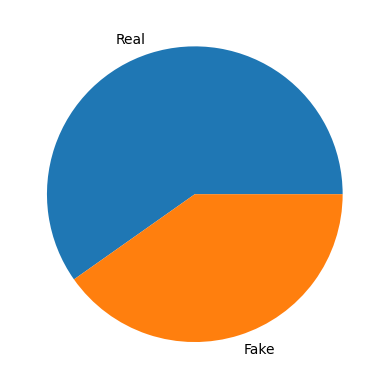

In [54]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Real', 'Fake'])
plt.show()

### Handle imbalanced dataset


In [55]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(4782, 152) (4782,)


In [57]:
y_train_smote.value_counts()


label
0    2391
1    2391
Name: count, dtype: int64

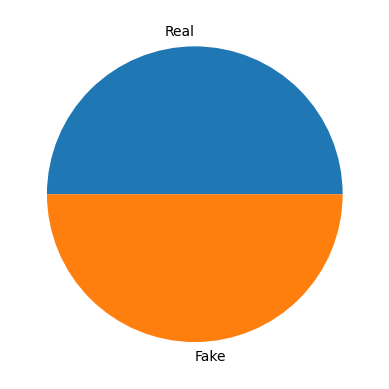

In [58]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Real', 'Fake'])
plt.show()

In [59]:
vectorized_x_train_smote

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(4782, 152), dtype=float32)

In [60]:
y_train_smote


0       0
1       1
2       1
3       1
4       1
       ..
4777    1
4778    1
4779    1
4780    1
4781    1
Name: label, Length: 4782, dtype: int64

In [61]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 152), dtype=float32)

In [62]:
y_test

3599    1
1054    0
3449    0
2846    0
3310    0
       ..
4504    0
1112    0
3575    0
1000    1
4512    0
Name: label, Length: 1000, dtype: int64

## Model Training and Evaluation


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression


In [68]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Naive Bayes


In [69]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.926
	Precision = 0.973
	Recall = 0.876
	F1-Score = 0.922
Testing Scores:
	Accuracy = 0.944
	Precision = 0.964
	Recall = 0.89
	F1-Score = 0.926


### Decision Tree


In [70]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Random Forest


In [74]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Support Vector Machine


In [75]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [77]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(mnb, file)